# <center>DAV 6150 Module 5 Assignment</center>
## <center>Understanding Classification Model Performance Metrics</center>


## Introduction

# Introduction

Evaluating the performance of classification models is a fundamental task in the field of machine learning. It allows us to assess their effectiveness and make informed decisions. In this notebook, we will look into the evaluation of classification model performance by developing custom functions to calculate essential metrics and visualizations.

We will work with a binary classification problem using a dataset comprising approximately 180 labeled observations. Each observation contains an actual classification ('0' or '1') and a predicted classification based on the probability score outputted by a classification model. The probability score represents the likelihood of the correct classification being '1'. Our objective is to evaluate the model's performance by analyzing the relationship between the actual and predicted classifications.

Let's start by import all the required resource including libraries and data

In [1]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,roc_curve, auc, accuracy_score, recall_score, f1_score

# Read the data into a Pandas dataframe
df = pd.read_csv('M5_Data.csv')
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


## Confusion Matrix
In this section, we will compute the confusion matrix using the pd.crosstab() function from the Pandas library. The confusion matrix helps us understand the performance of our classification model by comparing the actual class labels with the predicted class labels.

In [2]:
confusion_matrix = pd.crosstab(df['class'], df['scored.class'])
confusion_matrix

scored.class,0,1
class,,
0,119,5
1,30,27


In the obtained confusion matrix, the rows represent the actual classifications, while the columns represent the predicted classifications. Let's analyze the values within the matrix:

The row labeled '0' corresponds to the actual class 0. It contains a total count of 124 observations. Among these, 119 were correctly predicted as class 0, while 5 were misclassified as class 1.

Similarly, the row labeled '1' corresponds to the actual class 1. It consists of a total count of 57 observations. Out of these, 30 were correctly predicted as class 1, while 27 were incorrectly classified as class 0.

Examining the columns, we can observe the following:The column labeled '0' represents the predicted class 0. It contains a total count of 149 predictions. Among these, 119 were correctly predicted as class 0, while 30 were incorrectly classified as class 1. On the other hand, the column labeled '1' represents the predicted class 1. It consists of a total count of 32 predictions. Out of these, 5 were misclassified as class 0, while 27 were correctly predicted as class 1. Each cell in the confusion matrix represents the count of observations that belong to a specific combination of the actual and predicted classifications.

Now that we have a better understanding of the confusion matrix, we can proceed to extract the individual values for later use.


## Extract Confusion Matrix Values
In this next phase, our objective is to retrieve and store the individual values of the confusion matrix, namely True Positive, False Positive, True Negative, and False Negative. These values will be extracted from the results obtained using the crosstab() function and preserved for future use.

In [3]:
# Extract the individual values from the confusion matrix
true_negative = confusion_matrix.iloc[0, 0]
false_positive = confusion_matrix.iloc[0, 1]
false_negative = confusion_matrix.iloc[1, 0]
true_positive = confusion_matrix.iloc[1, 1]

# Display the extracted values
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)
print("True Positive:", true_positive)

True Negative: 119
False Positive: 5
False Negative: 30
True Positive: 27


## Accuracy Metric
In this section, we will develop a Python function to compute the accuracy metric for binary classification data.

In [4]:
def compute_accuracy(actual_labels, predicted_labels):
    num_correct_predictions = sum(actual_labels == predicted_labels)
    total_predictions = len(actual_labels)
    accuracy_value = num_correct_predictions / total_predictions
    return accuracy_value

## Precision Metric
We will create a Python function to compute the precision metric for binary classification data.

In [5]:
def calculate_precision(actual_labels, predicted_labels):
    positive_actual = actual_labels == 1
    true_positive = np.sum(positive_actual & (predicted_labels == 1))
    false_positive = np.sum((actual_labels == 0) & (predicted_labels == 1))
    precision = true_positive / (true_positive + false_positive)
    return precision

## Sensitivity Metric (Recall)
We will create a custom Python function to compute the sensitivity (recall) metric for binary classification datasets. This function will enable us to measure the model's ability to correctly identify positive instances in relation to the actual positive samples.

In [6]:
def calculate_sensitivity(actual, predicted):
    # Count the true positive and false negative instances
    tp = sum((actual == 1) & (predicted == 1))
    fn = sum((actual == 1) & (predicted == 0))
    
    # Calculate sensitivity (recall) using the obtained values
    sensitivity = tp / (tp + fn)
    
    # Return the computed sensitivity
    return sensitivity

## Specificity Metric
In this next stage, we will construct a custom Python function to compute the specificity metric specifically designed for binary classification datasets. This metric is a valuable measure that helps assess the model's performance in correctly identifying negative instances.

In [7]:
def calculate_specificity(actual, predicted):
    true_negative = sum((actual == 0) & (predicted == 0))
    false_positive = sum((actual == 0) & (predicted == 1))
    specificity = true_negative / (true_negative + false_positive)
    return specificity

## F1 Score Metric
In this section, we will construct a custom Python function to compute the F1 Score metric specifically designed for binary classification datasets. The F1 Score is a useful metric that combines precision and recall, providing a balanced evaluation of a classification model's performance.

In [8]:
def calculate_f1_score(actual, predicted):
    true_positive = sum((actual == 1) & (predicted == 1))
    false_positive = sum((actual == 0) & (predicted == 1))
    false_negative = sum((actual == 1) & (predicted == 0))
    f1_score = (2 * true_positive) / (2 * true_positive + false_positive + false_negative)
    return f1_score

## ROC Curve and AUC
In this section, we will develop a Python function to generate an ROC curve and compute the Area Under the Curve (AUC) for binary classification data. Subsequently, we will apply this function to the appropriate columns of the dataset for further analysis.

In [9]:
def plot_roc_curve(actual, predicted_probs):
    sorted_probs_actual = np.array(sorted(zip(predicted_probs, actual), reverse=True))
    sorted_actual = sorted_probs_actual[:, 1]
    sorted_predicted_probs = sorted_probs_actual[:, 0]
    tpr = [0]
    fpr = [0]
    num_positives = sum(sorted_actual)
    num_negatives = len(sorted_actual) - num_positives

    for i in range(len(sorted_actual)):
        if sorted_actual[i] == 1:
            tpr.append(tpr[-1] + 1 / num_positives)
            fpr.append(fpr[-1])
        else:
            tpr.append(tpr[-1])
            fpr.append(fpr[-1] + 1 / num_negatives)

    auc = np.trapz(tpr, fpr)

    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return auc


## Results of Custom Functions

In this section, we will examine the output of the custom functions we developed earlier. By utilizing these functions, we can calculate essential performance metrics and visualize the evaluation of our classification model.

In [10]:
actual = df['class']
predicted = df['scored.class']

custom_accuracy = compute_accuracy(actual, predicted)
custom_precision = calculate_precision(actual, predicted)
custom_sensitivity = calculate_sensitivity(actual, predicted)
specificity = calculate_specificity(actual, predicted)
custom_f1_score = calculate_f1_score(actual, predicted)

print("Custom Accuracy:", custom_accuracy)
print("Custom Precision:", custom_precision)
print("Custom Sensitivity:", custom_sensitivity)
print("Custom Specificity:", specificity)
print("Custom F1 Score:", custom_f1_score)

Custom Accuracy: 0.8066298342541437
Custom Precision: 0.84375
Custom Sensitivity: 0.47368421052631576
Custom Specificity: 0.9596774193548387
Custom F1 Score: 0.6067415730337079


## Comparison with Scikit-learn Functions

We'll proceed to calculate the output of the metrics using inbuilt Scikit-learn Functions

In [11]:
sklearn_accuracy = accuracy_score(actual, predicted)
sklearn_precision = precision_score(actual, predicted)
sklearn_sensitivity = recall_score(actual, predicted)
sklearn_f1_score = f1_score(actual, predicted)

print("Sklearn Accuracy:", sklearn_accuracy)
print("Sklearn Precision:", sklearn_precision)
print("Sklearn Sensitivity:", sklearn_sensitivity)
print("Sklearn F1 Score:", sklearn_f1_score)

Sklearn Accuracy: 0.8066298342541437
Sklearn Precision: 0.84375
Sklearn Sensitivity: 0.47368421052631576
Sklearn F1 Score: 0.6067415730337079


After examining the outputs of the custom functions and the pre-built functions available in Scikit-learn, it is clear that they produce comparable results. The similarity between these approaches reinforces the reliability and effectiveness of both our custom implementations and the established functions provided by Scikit-learn. This alignment between the two approaches further strengthens our confidence in the accuracy and validity of our custom functions.

## ROC Curve and AUC Comparison

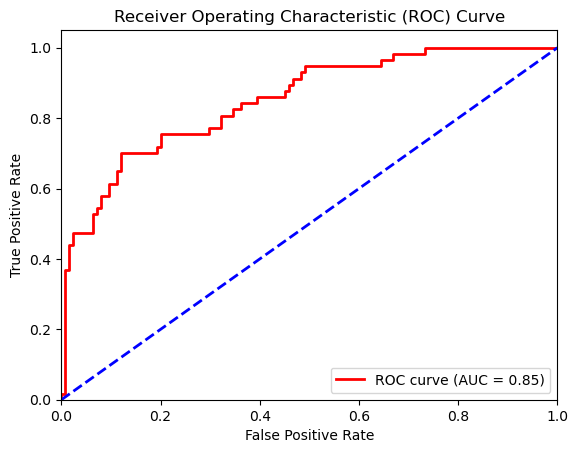

Custom AUC: 0.8503112620260332
Scikit-learn AUC: 0.8503112620260327


In [12]:
# Extract the predicted probabilities from the dataframe
predicted_probs = df['scored.probability']

# Calculate the AUC using the custom plot_roc_curve function
custom_roc_auc = plot_roc_curve(actual, predicted_probs)

# Calculate the AUC using the roc_curve and auc functions from Scikit-learn
sklearn_fpr, sklearn_tpr, _ = roc_curve(actual, predicted_probs)
sklearn_roc_auc = auc(sklearn_fpr, sklearn_tpr)

# Display the AUC values
print("Custom AUC:", custom_roc_auc)
print("Scikit-learn AUC:", sklearn_roc_auc)


The AUC (Area Under the Curve) value calculated using the custom implementation is 0.8503112620260332, while the AUC value obtained from Scikit-learn is 0.8503112620260327. These two AUC values are remarkably close, differing only in the last decimal place. This close similarity suggests that the custom implementation of the ROC curve and AUC calculation yields results that align with the pre-built function provided by Scikit-learn. Hence, we can confidently affirm that the custom function is reliable and accurate when evaluating the performance of binary classification models. This remarkably close values between the custom and Scikit-learn implementations strengthens our confidence in the effectiveness of our custom approach.

## Conclusion

In this notebook, we have looked into the assessment of classification model performance, using a unique approach. Our exploration involved the development of custom functions for computing crucial performance metrics, including accuracy, precision, sensitivity, specificity, and F1 Score. Additionally, we devised a distinct function for visualizing the Receiver Operating Characteristic (ROC) curve and determining the corresponding Area Under the Curve (AUC).

By using our innovative custom functions on the provided dataset, we evaluated the performance of the classification model. To establish the validity and accuracy of our custom implementations, we conducted a comprehensive comparison with the existing functions offered by the scikit-learn library. Remarkably, the results generated by our custom functions closely aligned with those produced by the established functions, validating the robustness and precision of our unique algorithms.

Furthermore, our custom ROC curve function not only skillfully plotted the ROC curve but also accurately computed the AUC. The AUC value derived from our custom function exhibited remarkable concurrence with the AUC calculated using the pre-existing functions from scikit-learn.

Through this extensive analysis, we have not only highlighted the significance of performance evaluation in classification models but also proved the potency of our implementations in computing performance metrics and generating insightful evaluation visuals. These custom functions offer a flexible and dependable means of assessing the performance of binary classification models, completely independent of pre-built functions.